# Activity: Address missing data<a href="#Activity:-Address-missing-data" class="anchor-link">¶</a>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

The datasets that data professionals use to solve problems typically
contain missing values, which must be dealt with in order to achieve
clean, useful data. This is particularly crucial in exploratory data
analysis (EDA). In this activity, you will learn how to address missing
data.

You are a financial data consultant, and an investor has tasked your
team with identifying new business opportunities. To help them decide
which future companies to invest in, you will provide a list of current
businesses valued at more than \$1 billion. These are sometimes referred
to as "unicorns." Your client will use this information to learn about
profitable businesses in general.

The investor has asked you to provide them with the following data:

-   Companies in the `hardware` industry based in either `Beijing`,
    `San Francisco`, or `London`
-   Companies in the `artificial intelligence` industry based in
    `London`
-   A list of the top 20 countries sorted by sum of company valuations
    in each country, excluding `United States`, `China`, `India`, and
    `United Kingdom`
-   A global valuation map of all countries with companies that joined
    the list after 2020
-   A global valuation map of all countries except `United States`,
    `China`, `India`, and `United Kingdom` (a separate map for Europe is
    also required)

Your dataset includes a list of businesses and data points, such as the
year they were founded; their industry; and their city, country, and
continent.

## **Step 1: Imports**<a href="#Step-1:-Imports" class="anchor-link">¶</a>

### Import libraries<a href="#Import-libraries" class="anchor-link">¶</a>

Import the following relevant Python libraries:

-   `numpy`
-   `pandas`
-   `matplotlib.pyplot`
-   `plotly.express`
-   `seaborn`

In \[1\]:

    # Import libraries and modules.

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly.express as px
    import seaborn as sns

### Load the dataset<a href="#Load-the-dataset" class="anchor-link">¶</a>

The dataset is currently in CSV format and in a file named
`Unicorn_Companies.csv`. As shown in this cell, the dataset has been
automatically loaded in for you. You do not need to download the .csv
file, or provide more code, in order to access the dataset and proceed
with this lab. Please continue with this activity by completing the
following instructions.

In \[2\]:

    # RUN THIS CELL TO IMPORT YOUR DATA.

    ### YOUR CODE HERE ###
    df_companies = pd.read_csv("Unicorn_Companies.csv")

## **Step 2: Data exploration**<a href="#Step-2:-Data-exploration" class="anchor-link">¶</a>

Explore the dataset and answer questions that will guide your management
of missing values.

### Display top rows<a href="#Display-top-rows" class="anchor-link">¶</a>

Display the first 10 rows of the data to understand how the dataset is
structured.

In \[3\]:

    # Display the first 10 rows of the data.
    df_companies.head(10)

Out\[3\]:

|     | Company      | Valuation | Date Joined | Industry                            | City          | Country/Region | Continent     | Year Founded | Funding | Select Investors                                  |
|-----|--------------|-----------|-------------|-------------------------------------|---------------|----------------|---------------|--------------|---------|---------------------------------------------------|
| 0   | Bytedance    | \$180B    | 4/7/17      | Artificial intelligence             | Beijing       | China          | Asia          | 2012         | \$8B    | Sequoia Capital China, SIG Asia Investments, S... |
| 1   | SpaceX       | \$100B    | 12/1/12     | Other                               | Hawthorne     | United States  | North America | 2002         | \$7B    | Founders Fund, Draper Fisher Jurvetson, Rothen... |
| 2   | SHEIN        | \$100B    | 7/3/18      | E-commerce & direct-to-consumer     | Shenzhen      | China          | Asia          | 2008         | \$2B    | Tiger Global Management, Sequoia Capital China... |
| 3   | Stripe       | \$95B     | 1/23/14     | Fintech                             | San Francisco | United States  | North America | 2010         | \$2B    | Khosla Ventures, LowercaseCapital, capitalG       |
| 4   | Klarna       | \$46B     | 12/12/11    | Fintech                             | Stockholm     | Sweden         | Europe        | 2005         | \$4B    | Institutional Venture Partners, Sequoia Capita... |
| 5   | Canva        | \$40B     | 1/8/18      | Internet software & services        | Surry Hills   | Australia      | Oceania       | 2012         | \$572M  | Sequoia Capital China, Blackbird Ventures, Mat... |
| 6   | Checkout.com | \$40B     | 5/2/19      | Fintech                             | London        | United Kingdom | Europe        | 2012         | \$2B    | Tiger Global Management, Insight Partners, DST... |
| 7   | Instacart    | \$39B     | 12/30/14    | Supply chain, logistics, & delivery | San Francisco | United States  | North America | 2012         | \$3B    | Khosla Ventures, Kleiner Perkins Caufield & By... |
| 8   | JUUL Labs    | \$38B     | 12/20/17    | Consumer & retail                   | San Francisco | United States  | North America | 2015         | \$14B   | Tiger Global Management                           |
| 9   | Databricks   | \$38B     | 2/5/19      | Data management & analytics         | San Francisco | United States  | North America | 2013         | \$3B    | Andreessen Horowitz, New Enterprise Associates... |

### Statistical properties of the dataset<a href="#Statistical-properties-of-the-dataset"
class="anchor-link">¶</a>

Use methods and attributes of the dataframe to get information and
descriptive statistics for the data, including its range, data types,
mean values, and shape.

In \[5\]:

    # Get the shape of the dataset.
    df_companies.shape

Out\[5\]:

    (1074, 10)

**Question: What is the shape of the dataset?**

The dataset has 1,074 rows and 10 columns.

In \[8\]:

    # Get the data types and number of non-null values in the dataset.

    df_companies.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1074 entries, 0 to 1073
    Data columns (total 10 columns):
     #   Column            Non-Null Count  Dtype 
    ---  ------            --------------  ----- 
     0   Company           1074 non-null   object
     1   Valuation         1074 non-null   object
     2   Date Joined       1074 non-null   object
     3   Industry          1074 non-null   object
     4   City              1058 non-null   object
     5   Country/Region    1074 non-null   object
     6   Continent         1074 non-null   object
     7   Year Founded      1074 non-null   int64 
     8   Funding           1074 non-null   object
     9   Select Investors  1073 non-null   object
    dtypes: int64(1), object(9)
    memory usage: 84.0+ KB

**Question: What are the data types of various columns?**

The data types of the columns are as follows:

-   Year Founded is an integer (int64)
-   All other columns (Company, Valuation, Date Joined, Industry, City,
    Country/Region, Continent, Year Founded, Funding, Select Investors)
    are objects.

**Question: How many columns contain null values?**

There are 2 columns that contain null values: City and Select Investors.

In \[9\]:

    # Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

    df_companies.describe()

Out\[9\]:

|       | Year Founded |
|-------|--------------|
| count | 1074.000000  |
| mean  | 2012.895717  |
| std   | 5.698573     |
| min   | 1919.000000  |
| 25%   | 2011.000000  |
| 50%   | 2014.000000  |
| 75%   | 2016.000000  |
| max   | 2021.000000  |

**Question: In what year was the oldest company founded?**

The oldest company was founded in 1919.

### Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

In order to answer the investor's questions, some data preprocessing
steps are required. The first step is to add a new column to the
dataframe containing just the year each company became a unicorn
company. Call this new column `Year Joined`.

In \[13\]:

    # Create a new column "Year Joined" from "Date Joined".

    df_companies['Date Joined'] = pd.to_datetime(df_companies['Date Joined'])
    df_companies['Year Joined'] = df_companies['Date Joined'].dt.year

    df_companies.head(5)

Out\[13\]:

|     | Company   | Valuation | Date Joined | Industry                        | City          | Country/Region | Continent     | Year Founded | Funding | Select Investors                                  | Year Joined |
|-----|-----------|-----------|-------------|---------------------------------|---------------|----------------|---------------|--------------|---------|---------------------------------------------------|-------------|
| 0   | Bytedance | \$180B    | 2017-04-07  | Artificial intelligence         | Beijing       | China          | Asia          | 2012         | \$8B    | Sequoia Capital China, SIG Asia Investments, S... | 2017        |
| 1   | SpaceX    | \$100B    | 2012-12-01  | Other                           | Hawthorne     | United States  | North America | 2002         | \$7B    | Founders Fund, Draper Fisher Jurvetson, Rothen... | 2012        |
| 2   | SHEIN     | \$100B    | 2018-07-03  | E-commerce & direct-to-consumer | Shenzhen      | China          | Asia          | 2008         | \$2B    | Tiger Global Management, Sequoia Capital China... | 2018        |
| 3   | Stripe    | \$95B     | 2014-01-23  | Fintech                         | San Francisco | United States  | North America | 2010         | \$2B    | Khosla Ventures, LowercaseCapital, capitalG       | 2014        |
| 4   | Klarna    | \$46B     | 2011-12-12  | Fintech                         | Stockholm     | Sweden         | Europe        | 2005         | \$4B    | Institutional Venture Partners, Sequoia Capita... | 2011        |

For each country, you want to calculate the sum of all valuations of
companies from that country. However, in order to do this, you'll need
to first prepare the data. Currently, the data in the `Valuation` column
is a string that starts with a `$` and ends with a `B`. Because this
column is not in a numeric datatype, pandas cannot perform mathematical
operations on its values. The data in this column needs to be converted
to a numeric datatype.

In this step, define a function called `str_to_num()` that accepts as an
argument:

-   `x`: a string in the format of the values contained in the
    `Valuation` column

And returns:

-   `x`: an `int` of the number represented by the input string

<!-- -->

    Example:

     [IN]:  str_to_num('$4B')
    [OUT]:  4

To do this, use the string
[`strip()`](https://docs.python.org/3/library/stdtypes.html#str.strip)
method. This method is applied to a string. Its argument is a string
that contains all the characters that you want to remove from the
beginning and end of a given string—in any order. The specified
characters will be removed until a valid character is encountered. This
process is applied moving forward from the beginning of the string and
also moving in reverse from the end of the string, thus removing
unwanted beginning and trailing characters.

    Example:

     [IN]:  my_string = '#....... Section 3.2.1 Issue #32 .......'
            my_string = my_string.strip('.#! ')
            print(my_string)

    [OUT]:  'Section 3.2.1 Issue #32'

Note that you must reassign the result back to a variable or else the
change will not be permanent.

In \[14\]:

    # Define the `str_to_num()` function

    def str_to_num(x):
        x = x.strip('$B')
        x = int(x)
        
        return x

Now, use this function to create a new column called `valuation_num`
that represents the `Valuation` column as an integer value. To do this,
use the series method
[`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)
to apply the `str_to_num()` function to the `Valuation` column.

`apply()` is a method that can be used on a `DataFrame` or `Series`
object. In this case, you're using it on the `Valuation` series. The
method accepts a function as an argument and applies that function to
each value in the series.

    Example:

     [IN]: def square(x):
               return x ** 2

           my_series = pd.Series([0, 1, 2, 3])
           my_series

    [OUT]: 0    0
           1    1
           2    2
           3    3
           dtype: int64

     [IN]: my_series = my_series.apply(square)
           my_series

    [OUT]: 0    0
           1    1
           2    4
           3    9
           dtype: int64

Notice that the function passed as an argument to the `apply()` method
does not have parentheses. It's just the function name.

In \[17\]:

    # Apply the `str_to_num()` function to the `Valuation` column
    # and assign the result back to a new column called `valuation_num`

    df_companies['Valuation_num'] = df_companies['Valuation'].apply(str_to_num)
    df_companies[['Valuation', 'Valuation_num']].head()

Out\[17\]:

|     | Valuation | Valuation_num |
|-----|-----------|---------------|
| 0   | \$180B    | 180           |
| 1   | \$100B    | 100           |
| 2   | \$100B    | 100           |
| 3   | \$95B     | 95            |
| 4   | \$46B     | 46            |

### Find missing values<a href="#Find-missing-values" class="anchor-link">¶</a>

The unicorn companies dataset is fairly clean, with few missing values.

In \[18\]:

    # Find the number of missing values in each column in this dataset.

    df_companies.isna().sum()

Out\[18\]:

    Company              0
    Valuation            0
    Date Joined          0
    Industry             0
    City                16
    Country/Region       0
    Continent            0
    Year Founded         0
    Funding              0
    Select Investors     1
    Year Joined          0
    Valuation_num        0
    dtype: int64

**Question: How many missing values are in each column in the dataset?**

There is a single missing value in the Select Investors column and 16
missing cities. There are no missing values in other columns.

### Review rows with missing values<a href="#Review-rows-with-missing-values" class="anchor-link">¶</a>

Before dealing with missing values, it's important to understand the
nature of the missing value that is being filled. Display all rows with
missing values from `df_companies`. To do this, perform the following
three steps:

1.  Apply the `isna()` method to the `df_companies` dataframe as you did
    in the last step. Remember, this results in a dataframe of the same
    shape as `df_companies` where each value is `True` if its contents
    are `NaN` and a `False` if its contents are not `NaN`. Assign the
    results to a variable called `mask`.

In \[22\]:

    # 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`
    mask = df_companies.isna()
    mask.tail(5)

Out\[22\]:

|      | Company | Valuation | Date Joined | Industry | City  | Country/Region | Continent | Year Founded | Funding | Select Investors | Year Joined | Valuation_num |
|------|---------|-----------|-------------|----------|-------|----------------|-----------|--------------|---------|------------------|-------------|---------------|
| 1069 | False   | False     | False       | False    | False | False          | False     | False        | False   | False            | False       | False         |
| 1070 | False   | False     | False       | False    | False | False          | False     | False        | False   | False            | False       | False         |
| 1071 | False   | False     | False       | False    | False | False          | False     | False        | False   | False            | False       | False         |
| 1072 | False   | False     | False       | False    | False | False          | False     | False        | False   | False            | False       | False         |
| 1073 | False   | False     | False       | False    | False | False          | False     | False        | False   | False            | False       | False         |

You're not done yet. You still need to go from this dataframe of Boolean
values to a dataframe of just the rows of `df_companies` that contain at
least one `NaN` value. This means that you need a way to find the
indices of the rows of the Boolean dataframe that contain at least one
`True` value, then extract those indices from `df_companies`.

You can do this using the
[`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)
method for `DataFrame` objects. This method returns a Boolean `Series`
indicating whether any value is `True` over a specified axis.

    Example:

    df =     
            A      B    C
        0   0      a    10
        1   False  0    1
        2   NaN    NaN  NaN


     [IN]: df.any(axis=0)

    [OUT]: A    False
           B     True
           C     True
           dtype: bool

     [IN]: df.any(axis=1)

    [OUT]: 0     True
           1     True
           2    False
           dtype: bool

Note that `0`, `False`, and `NaN` are considered `False` and anything
else is considered `True`.

1.  Apply the `any()` method to the Boolean dataframe you created to
    make a Boolean series where each element in the series represents
    `True` if a row of the dataframe contains any `True` values and
    `False` if any row in the dataframe contains any `False` values.
    Assign the results back to `mask`.

In \[32\]:

    # 2. Apply the `any()` method to `mask` and assign the results back to `mask`

    mask = mask.any(axis=0)

1.  Because `mask` is now a series of Boolean values, you can use it as
    a Boolean mask. Apply the Boolean mask to the `df_companies`
    dataframe to return a filtered dataframe containing just the rows
    that contain a missing value. Assign the results to a variable
    called `df_missing_rows`.

In \[37\]:

    # 3. Apply `mask` as a Boolean mask to `df_companies` and assign results to `df_missing_rows`

    df_missing_rows = df_companies[df_companies.isna().any(axis=1)]
    df_missing_rows.head(5)

Out\[37\]:

|     | Company     | Valuation | Date Joined | Industry                        | City | Country/Region | Continent     | Year Founded | Funding | Select Investors                                  | Year Joined | Valuation_num |
|-----|-------------|-----------|-------------|---------------------------------|------|----------------|---------------|--------------|---------|---------------------------------------------------|-------------|---------------|
| 12  | FTX         | \$32B     | 2021-07-20  | Fintech                         | NaN  | Bahamas        | North America | 2018         | \$2B    | Sequoia Capital, Thoma Bravo, Softbank            | 2021        | 32            |
| 170 | HyalRoute   | \$4B      | 2020-05-26  | Mobile & telecommunications     | NaN  | Singapore      | Asia          | 2015         | \$263M  | Kuang-Chi                                         | 2020        | 4             |
| 242 | Moglix      | \$3B      | 2021-05-17  | E-commerce & direct-to-consumer | NaN  | Singapore      | Asia          | 2015         | \$471M  | Jungle Ventures, Accel, Venture Highway           | 2021        | 3             |
| 251 | Trax        | \$3B      | 2019-07-22  | Artificial intelligence         | NaN  | Singapore      | Asia          | 2010         | \$1B    | Hopu Investment Management, Boyu Capital, DC T... | 2019        | 3             |
| 325 | Amber Group | \$3B      | 2021-06-21  | Fintech                         | NaN  | Hong Kong      | Asia          | 2015         | \$328M  | Tiger Global Management, Tiger Brokers, DCM Ve... | 2021        | 3             |

**Question: Is there a specific country/region that shows up a lot in
this missing values dataframe? Which one?**

12 of the 17 rows with missing values are for companies from Singapore.

**Question: What steps did you take to find missing data?**

-   Dataframe.isna() will return a Boolean dataframe indicating every
    location that is NaN with True.
-   You can use sum() in conjunction with isna() to get the counts of
    NaN values in each column.
-   You can use any() in conjunction with isna() to create a Boolean
    mask, which can be applied to the original dataframe to obtain just
    the rows with at least one NaN value.

**Question: What observations can be made about the forms and context of
missing data?**

Missing values can take different forms and are usually
context-specific. Not every missing value is labeled as na or None, or
Null.

**Question: What other methods could you use to address missing data?**

If possible, ask the business users for insight into the causes of
missing values and, if possible, get domain knowledge to intelligently
impute these values.

## Step 3: Model building<a href="#Step-3:-Model-building" class="anchor-link">¶</a>

Think of the model you are building as the completed dataset, which you
will then use to inform the questions the investor has asked of you.

### Two ways to address missing values<a href="#Two-ways-to-address-missing-values" class="anchor-link">¶</a>

There are several ways to address missing values, which is critical in
EDA. The two primary methods are removing them and imputing other values
in their place. Choosing the proper method depends on the business
problem and the value the solution will add or take away from the
dataset.

Here, you will try both.

To compare the the effect of different actions, first store the original
number of values in a variable. Create a variable called `count_total`
that is an integer representing the total number of values in
`df_companies`. For example, if the dataframe had 5 rows and 2 columns,
then this number would be 10.

In \[39\]:

    # Store the total number of values in a variable called `count_total`

    count_total = df_companies.size
    count_total

Out\[39\]:

    12888

Now, remove all rows containing missing values and store the total
number of remaining values in a variable called `count_dropna_rows`.

In \[59\]:

    # Drop the rows containing missing values, determine number of remaining values 

    count_dropna_rows = df_companies.dropna().size
    count_dropna_rows

Out\[59\]:

    12684

Now, remove all columns containing missing values and store the total
number of cells in a variable called `count_dropna_columns`.

In \[60\]:

    # Drop the columns containing missing values, determine number of remaining values

    count_dropna_columns = df_companies.dropna(axis=1).size
    count_dropna_columns

Out\[60\]:

    10740

Next, print the percentage of values removed by each method and compare
them.

In \[64\]:

    # Print the percentage of values removed by dropping rows.
    percentage_removed_rows = ((count_total - count_dropna_rows) / count_total) * 100
    print(f' Percentage removed, rows: {percentage_removed_rows: .3f}')

    # Print the percentage of values removed by dropping columns.
    percentage_removed_columns = ((count_total - count_dropna_columns) / count_total) * 100
    print(f' Percentage removes, columns: {percentage_removed_columns: .3f}')

     Percentage removed, rows:  1.583
     Percentage removes, columns:  16.667

**Question: Which method was most effective? Why?**

The method of dropping columns was more effective because it removed
16.67% of the values, compared to 1.58% for dropping rows. This
indicates that the columns contained a larger proportion of missing
values, making the column removal more impactful in reducing the dataset
size.

Now, practice the second method: imputation. Perform the following
steps:

1.  Use the
    [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)
    dataframe method to fill each missing value with the next non-NaN
    value in its column. Assign the results to a new dataframe called
    `df_companies_backfill`.

<!-- -->

    Example:

    df =     
            A    B    C
        0   5    a    NaN
        1   10   NaN  False
        2   NaN  c    True

     [IN]: df.fillna(method='backfill')

    [OUT]: 
            A    B    C
        0   5    a    False
        1   10   c    False
        2   NaN  c    True

Notice that if there is a `NaN` value in the last row, it will not
backfill because there is no subsequent value in the column to refer to.

1.  Show the rows that previously had missing values.

In \[65\]:

    # 1. Fill missing values using the 'fillna()' method, back-filling

    df_companies_backfill = df_companies.fillna(method='backfill')


    # 2. Show the rows that previously had missing values

    df_companies_backfill.iloc[df_missing_rows.index, :]

Out\[65\]:

|      | Company                    | Valuation | Date Joined | Industry                            | City          | Country/Region | Continent     | Year Founded | Funding | Select Investors                                  | Year Joined | Valuation_num |
|------|----------------------------|-----------|-------------|-------------------------------------|---------------|----------------|---------------|--------------|---------|---------------------------------------------------|-------------|---------------|
| 12   | FTX                        | \$32B     | 2021-07-20  | Fintech                             | Jacksonville  | Bahamas        | North America | 2018         | \$2B    | Sequoia Capital, Thoma Bravo, Softbank            | 2021        | 32            |
| 170  | HyalRoute                  | \$4B      | 2020-05-26  | Mobile & telecommunications         | El Segundo    | Singapore      | Asia          | 2015         | \$263M  | Kuang-Chi                                         | 2020        | 4             |
| 242  | Moglix                     | \$3B      | 2021-05-17  | E-commerce & direct-to-consumer     | San Francisco | Singapore      | Asia          | 2015         | \$471M  | Jungle Ventures, Accel, Venture Highway           | 2021        | 3             |
| 251  | Trax                       | \$3B      | 2019-07-22  | Artificial intelligence             | Amsterdam     | Singapore      | Asia          | 2010         | \$1B    | Hopu Investment Management, Boyu Capital, DC T... | 2019        | 3             |
| 325  | Amber Group                | \$3B      | 2021-06-21  | Fintech                             | San Francisco | Hong Kong      | Asia          | 2015         | \$328M  | Tiger Global Management, Tiger Brokers, DCM Ve... | 2021        | 3             |
| 382  | Ninja Van                  | \$2B      | 2021-09-27  | Supply chain, logistics, & delivery | San Francisco | Singapore      | Asia          | 2014         | \$975M  | B Capital Group, Monk's Hill Ventures, Dynamic... | 2021        | 2             |
| 541  | Advance Intelligence Group | \$2B      | 2021-09-23  | Artificial intelligence             | Helsinki      | Singapore      | Asia          | 2016         | \$536M  | Vision Plus Capital, GSR Ventures, ZhenFund       | 2021        | 2             |
| 629  | LinkSure Network           | \$1B      | 2015-01-01  | Mobile & telecommunications         | Shanghai      | China          | Asia          | 2013         | \$52M   | Sequoia Capital India, The Times Group, GMO Ve... | 2015        | 1             |
| 811  | Carousell                  | \$1B      | 2021-09-15  | E-commerce & direct-to-consumer     | New York      | Singapore      | Asia          | 2012         | \$288M  | 500 Global, Rakuten Ventures, Golden Gate Vent... | 2021        | 1             |
| 848  | Matrixport                 | \$1B      | 2021-06-01  | Fintech                             | San Francisco | Singapore      | Asia          | 2019         | \$100M  | Dragonfly Captial, Qiming Venture Partners, DS... | 2021        | 1             |
| 880  | bolttech                   | \$1B      | 2021-07-01  | Fintech                             | Englewood     | Singapore      | Asia          | 2018         | \$210M  | Mundi Ventures, Doqling Capital Partners, Acti... | 2021        | 1             |
| 889  | Carro                      | \$1B      | 2021-06-14  | E-commerce & direct-to-consumer     | Lincoln       | Singapore      | Asia          | 2015         | \$595M  | SingTel Innov8, Alpha JWC Ventures, Golden Gat... | 2021        | 1             |
| 893  | Cider                      | \$1B      | 2021-09-02  | E-commerce & direct-to-consumer     | Mexico City   | Hong Kong      | Asia          | 2020         | \$140M  | Andreessen Horowitz, DST Global, IDG Capital      | 2021        | 1             |
| 980  | NIUM                       | \$1B      | 2021-07-13  | Fintech                             | Bengaluru     | Singapore      | Asia          | 2014         | \$285M  | Vertex Ventures SE Asia, Global Founders Capit... | 2021        | 1             |
| 986  | ONE                        | \$1B      | 2021-12-08  | Internet software & services        | New York      | Singapore      | Asia          | 2011         | \$515M  | Temasek, Guggenheim Investments, Qatar Investm... | 2021        | 1             |
| 994  | PatSnap                    | \$1B      | 2021-03-16  | Internet software & services        | London        | Singapore      | Asia          | 2007         | \$352M  | Sequoia Capital China, Shunwei Capital Partner... | 2021        | 1             |
| 1061 | WeLab                      | \$1B      | 2017-11-08  | Fintech                             | Beijing       | Hong Kong      | Asia          | 2013         | \$871M  | Sequoia Capital China, ING, Alibaba Entreprene... | 2017        | 1             |

**Question: Do the values that were used to fill in for the missing
values make sense?**

No, the values seem to be added without consideration of the country
those cities are located in.

Another option is to fill the values with a certain value, such as
'Unknown'. However, doing so doesn’t add any value to the dataset and
could make finding the missing values difficult in the future. Reviewing
the missing values in this dataset determines that it is fine to leave
the values as they are. This also avoids adding bias to the dataset.

## Step 4: Results and evaluation<a href="#Step-4:-Results-and-evaluation" class="anchor-link">¶</a>

Now that you've addressed your missing values, provide your investor
with their requested data points.

### Companies in the `Hardware` Industry<a href="#Companies-in-the-Hardware-Industry" class="anchor-link">¶</a>

Your investor is interested in identifying unicorn companies in the
`Hardware` industry in the following cities: `Beijing`, `San Francisco`,
and `London`. They are also interested in companies in the
`Artificial intelligence` industry in `London`.

Write a selection statement that extracts the rows that meet these
criteria. This task requires complex conditional logic. Break the
process into the following parts.

1.  Create a mask to apply to the `df_companies` dataframe. The
    following logic is a pseudo-code representation of how this mask
    could be structured.

<!-- -->

    ((Industry==Hardware) and (City==Beijing, San Francisco, or London)) 
    OR  
    ((Industry==Artificial intelligence) and (City==London))

You're familiar with how to create Boolean masks based on conditional
logic in pandas. However, you might not know how to write a conditional
statement that selects rows that have *any one of several possible
values* in a given column. In this case, this is the
`(City==Beijing, San Francisco, or London)` part of the expression.

For this type of construction, use the
[`isin()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin)
`Series` method. This method is applied to a pandas series and, for each
value in the series, checks whether it is a member of whatever is passed
as its argument.

    Example:

     [IN]: my_series = pd.Series([0, 1, 2, 3])
           my_series

    [OUT]: 0    0
           1    1
           2    2
           3    3
           dtype: int64

     [IN]: my_series.isin([1, 2])

    [OUT]: 0    False
           1     True
           2     True
           3    False
           dtype: bool

1.  Apply the mask to the `df_companies` dataframe and assign the result
    to a new variable called `df_invest`.

In \[66\]:

    # 1. Create a Boolean mask using conditional logic

    cities = ['Beijing', 'San Francisco', 'London']
    mask = (
        (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
    ) | (
        (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
    )

    # 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

    df_invest = df_companies[mask]
    df_invest

Out\[66\]:

|      | Company             | Valuation | Date Joined | Industry                | City          | Country/Region | Continent     | Year Founded | Funding | Select Investors                                  | Year Joined | Valuation_num |
|------|---------------------|-----------|-------------|-------------------------|---------------|----------------|---------------|--------------|---------|---------------------------------------------------|-------------|---------------|
| 36   | Bitmain             | \$12B     | 2018-07-06  | Hardware                | Beijing       | China          | Asia          | 2015         | \$765M  | Coatue Management, Sequoia Capital China, IDG ... | 2018        | 12            |
| 43   | Global Switch       | \$11B     | 2016-12-22  | Hardware                | London        | United Kingdom | Europe        | 1998         | \$5B    | Aviation Industry Corporation of China, Essenc... | 2016        | 11            |
| 147  | Chipone             | \$5B      | 2021-12-16  | Hardware                | Beijing       | China          | Asia          | 2008         | \$1B    | China Grand Prosperity Investment, Silk Road H... | 2021        | 5             |
| 845  | Density             | \$1B      | 2021-11-10  | Hardware                | San Francisco | United States  | North America | 2014         | \$217M  | Founders Fund, Upfront Ventures, 01 Advisors      | 2021        | 1             |
| 873  | BenevolentAI        | \$1B      | 2015-06-02  | Artificial intelligence | London        | United Kingdom | Europe        | 2013         | \$292M  | Woodford Investment Management                    | 2015        | 1             |
| 923  | Geek+               | \$1B      | 2018-11-21  | Hardware                | Beijing       | China          | Asia          | 2015         | \$439M  | Volcanics Ventures, Vertex Ventures China, War... | 2018        | 1             |
| 1040 | TERMINUS Technology | \$1B      | 2018-10-25  | Hardware                | Beijing       | China          | Asia          | 2015         | \$623M  | China Everbright Limited, IDG Capital, iFLYTEK    | 2018        | 1             |
| 1046 | Tractable           | \$1B      | 2021-06-16  | Artificial intelligence | London        | United Kingdom | Europe        | 2014         | \$120M  | Insight Partners, Ignition Partners, Georgian ... | 2021        | 1             |

**Question: How many companies meet the criteria given by the
investor?**

8 companies meet the stated criteria.

### List of countries by sum of valuation<a href="#List-of-countries-by-sum-of-valuation"
class="anchor-link">¶</a>

For each country, sum the valuations of all companies in that country,
then sort the results in descending order by summed valuation. Assign
the results to a variable called `national_valuations`.

In \[69\]:

    # Group the data by`Country/Region`
    national_valuations = df_companies.groupby('Country/Region')['Valuation_num'].sum().sort_values(ascending=False).reset_index()

    # Print the top 15 values of the DataFrame.
    national_valuations.head(15)

Out\[69\]:

|     | Country/Region | Valuation_num |
|-----|----------------|---------------|
| 0   | United States  | 1933          |
| 1   | China          | 696           |
| 2   | India          | 196           |
| 3   | United Kingdom | 195           |
| 4   | Germany        | 72            |
| 5   | Sweden         | 63            |
| 6   | Australia      | 56            |
| 7   | France         | 55            |
| 8   | Canada         | 49            |
| 9   | South Korea    | 41            |
| 10  | Israel         | 39            |
| 11  | Brazil         | 37            |
| 12  | Bahamas        | 32            |
| 13  | Indonesia      | 28            |
| 14  | Singapore      | 21            |

**Question: Which countries have the highest sum of valuation?**

The sorted data indicates that the four countries with higest total
company valuation are the United States, China, India, and the United
Kingdom. However, your investor specified that these countries should
not be included in the list because they are outliers.

### Filter out top 4 outlying countries<a href="#Filter-out-top-4-outlying-countries" class="anchor-link">¶</a>

Use this grouped and summed data to plot a barplot. However, to meet the
needs of your stakeholder, you must first remove the United States,
China, India, and the United Kingdom. Remove these countries from
`national_valuations` and reassign the results to a variable called
`national_valuations_no_big4`.

In \[70\]:

    # Remove outlying countries

    national_valuation_no_big4 = national_valuations.iloc[4:, :]
    national_valuation_no_big4.head()

Out\[70\]:

|     | Country/Region | Valuation_num |
|-----|----------------|---------------|
| 4   | Germany        | 72            |
| 5   | Sweden         | 63            |
| 6   | Australia      | 56            |
| 7   | France         | 55            |
| 8   | Canada         | 49            |

### BONUS CONTENT: Alternative approach (optional)<a href="#BONUS-CONTENT:-Alternative-approach-(optional)"
class="anchor-link">¶</a>

You can also use `isin()` to create a Boolean mask to filter out
specific values of the `Country/Region` column. In this case, this
process is longer and more complicated than simply using the iloc\[\]
statement. However, there will be situations where this is the most
direct approach.

How could you use `isin()` and your knowledge of pandas conditional
operators and Boolean masks to accomplish the same task?

In \[71\]:

    # (Optional) Use `isin()` to create a Boolean mask to accomplish the same task
    mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
    national_valuations_no_big4 = national_valuations[mask]
    national_valuations_no_big4.head()

Out\[71\]:

|     | Country/Region | Valuation_num |
|-----|----------------|---------------|
| 4   | Germany        | 72            |
| 5   | Sweden         | 63            |
| 6   | Australia      | 56            |
| 7   | France         | 55            |
| 8   | Canada         | 49            |

### Create barplot for top 20 non-big-4 countries<a href="#Create-barplot-for-top-20-non-big-4-countries"
class="anchor-link">¶</a>

Now, the data is ready to reveal the top 20 non-big-4 countries with the
highest total company valuations. Use seaborn's
[`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html)
function to create a plot showing national valuation on one axis and
country on the other.

In \[75\]:

    # Create a barplot to compare the top 20 countries with highest company valuations.
    sns.barplot(data=national_valuation_no_big4.head(20),
               y='Country/Region',
               x='Valuation_num')
    plt.title('Top 20 non-big-4 countries by total company valuation')
    plt.show();

![](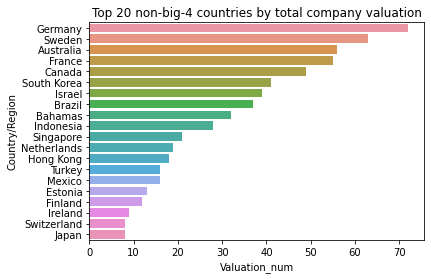%0A)

### Plot maps<a href="#Plot-maps" class="anchor-link">¶</a>

Your investor has also asked for a global valuation map of all countries
except `United States`, `China`, `India`, and `United Kingdom` (a.k.a.
"big-four countries").

You have learned about using
[`scatter_geo()`](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo)
from the `plotly.express` library to create plot data on a map. Create a
`scatter_geo()` plot that depicts the total valuations of each
non-big-four country on a world map, where each valuation is shown as a
circle on the map, and the size of the circle is proportional to that
country's summed valuation.

In \[76\]:

    # Plot the sum of valuations per country.

    data = national_valuation_no_big4

    px.scatter_geo(data,
                  locations = 'Country/Region',
                  size = 'Valuation_num',
                  locationmode = 'country names',
                  color = 'Country/Region',
                  title = 'Total company valuations by country (non-big-four)')

**Question: How is the valuation sum per country visualized in the
plot?**

Valuation sum per country is visualized by the size of circles around
the map.

**Question: Does any region stand out as having a lot of activity?**

Europe has a lot of unicorn companies in a concentrated area.

## Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

**What are some key takeaways that you learned during this lab?**

-   Missing data is a common problem for data professionals anytime they
    work with a data sample.
-   Addressing missing values is a part of the data-cleaning process and
    an important step in EDA.
-   Address missing values by either removing them or filling them in.
-   When considering how to address missing values, keep in mind the
    business, the data, and the questions to be answered. Always ensure
    you are not introducing bias into the dataset.
-   Addressing the missing values enabled you to answer your investor's
    questions.

**How would you present your findings from this lab to others? Consider
the information you would provide (and what you would omit), how you
would share the various data insights, and how data visualizations could
help your presentation.**

-   For the industry specific companies in certain locations, you could
    provide a short list of company names and locations.
-   For the top 20 countries by sum of valuations, you could use the
    plot you created in this lab or share a list.
-   For the top 20 countries sorted by sum of company valuations in each
    country, you would exclude United cities, Chine, India, and United
    Kingdom.
-   For the questions concerning the valuation map, in addition to your
    visuals, you would provide a short summary of the data points. This
    is becc

**Reference**

[Bhat, M.A. *Unicorn
Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

**Congratulations!** You've completed this lab. However, you may not
notice a green check mark next to this item on Coursera's platform.
Please continue your progress regardless of the check mark. Just click
on the "save" icon at the top of this notebook to ensure your work has
been logged.